In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import math

In [25]:
df = pd.read_csv('/home/murali/Documents/rass/data/2021_weather_data/Jan/F2021010617S8050014.CSV', skiprows = 6)
pd.set_option('display.max_columns', None)
df.columns = df.columns.str.strip()
df

,ObsTime,DCnt,ST,RE,SondeN,FCnt,AGC,rcvFREQ,WM,WD,WS,Height,Xdistanc,Ydistanc,GF,HDP,PDP,GeodetLat,GeodetLon,V,Press0,Temp0,Humi0,FE,FRT,FTI,FVH,FVL,FSP1,FSP2,FSP3,FSP4,N,N1,N2,N3,N4,N5,N6,N7,N8
0,17:16:34,0,7,0,8050014,1956,220,404.30468,1,80.00,5.30,360.0,0.0,0.0,2,0.7,2.1,13.45917,79.17556,0,971.3,22.0,92.0,0000,355.81,0.00,327.72,346.30,0.00,2.22,211.79,0.00,12,01,04,07,08,09,14,17,19
1,17:16:35,2,7,0,8050014,1958,220,404.30468,1,64.71,6.36,363.2,23.6,-55.7,2,0.7,2.1,13.45866,79.17577,0,970.9,21.8,89.8,0000,355.81,0.00,327.72,346.30,0.00,1.93,0.00,0.00,12,01,04,07,08,09,14,17,19
2,17:16:36,4,7,0,8050014,1960,220,404.30468,1,88.95,6.78,367.8,19.3,-60.3,2,0.7,2.1,13.45862,79.17573,0,970.3,21.9,89.6,0000,355.81,0.00,327.72,346.30,0.00,2.22,211.90,0.00,12,01,04,07,08,09,14,17,19
3,17:16:37,6,7,0,8050014,1962,220,404.30468,1,95.80,7.14,372.8,14.9,-61.4,2,0.7,2.1,13.45861,79.17569,0,969.8,22.0,89.0,0000,355.81,0.00,327.73,346.30,0.00,1.93,0.00,0.00,12,01,04,07,08,09,14,17,19
4,17:16:38,8,7,0,8050014,1964,220,404.30468,1,98.25,6.95,377.3,9.1,-57.2,2,0.7,2.1,13.45865,79.17564,0,969.3,22.0,89.1,0000,355.81,0.00,327.73,346.30,0.00,2.22,212.04,0.00,12,01,04,07,08,09,14,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,19:24:22,-----,7,-,8050014,-----,---,---------,-,294.57,3.92,18744.6,-18985.3,31174.4,-,----,----,13.74005,79.00053,4,67.9,-72.4,-----,----,------,------,------,------,------,------,------,------,-,--,--,--,--,--,--,--,--
7669,19:24:23,-----,7,-,8050014,-----,---,---------,-,293.93,3.58,18719.6,-18981.6,31169.7,-,----,----,13.74001,79.00057,4,68.2,-73.0,-----,----,------,------,------,------,------,------,------,------,-,--,--,--,--,--,--,--,--
7670,19:24:24,15340,7,0,8050014,17298,109,404.30012,1,293.07,3.24,18694.5,-18977.9,31165.0,2,0.9,2.2,13.73997,79.00060,0,68.5,-73.7,5.3,0000,355.58,0.00,327.78,120.03,0.00,0.94,0.00,0.00,10,06,07,13,14,17,19,28,30
7671,19:24:25,-----,7,-,8050014,-----,---,---------,-,291.90,2.89,18669.5,-18973.0,31163.4,-,----,----,13.73995,79.00064,4,68.8,-73.7,-----,----,------,------,------,------,------,------,------,------,-,--,--,--,--,--,--,--,--


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7673 entries, 0 to 7672
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ObsTime    7673 non-null   object 
 1   DCnt       7673 non-null   object 
 2   ST         7673 non-null   int64  
 3   RE         7673 non-null   object 
 4   SondeN     7673 non-null   object 
 5   FCnt       7673 non-null   object 
 6   AGC        7673 non-null   object 
 7   rcvFREQ    7673 non-null   object 
 8   WM         7673 non-null   object 
 9   WD         7673 non-null   float64
 10  WS         7673 non-null   float64
 11  Height     7673 non-null   float64
 12  Xdistanc   7673 non-null   float64
 13  Ydistanc   7673 non-null   float64
 14  GF         7673 non-null   object 
 15  HDP        7673 non-null   object 
 16  PDP        7673 non-null   object 
 17  GeodetLat  7673 non-null   float64
 18  GeodetLon  7673 non-null   float64
 19  V          7673 non-null   int64  
 20  Press0  

In [27]:
df.describe()

,ST,WD,WS,Height,Xdistanc,Ydistanc,GeodetLat,GeodetLon,V
count,7673.0,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000
mean,7.0,176.741242,8.903769,13847.631422,-17418.825870,17386.035358,13.615791,79.014972,0.079109
std,0.0,72.255266,6.501899,6466.490316,9753.883772,13067.100358,0.117664,0.089892,0.578664
min,7.0,10.890000,0.120000,360.000000,-33526.300000,-61.400000,13.458610,78.866470,0.000000
25%,7.0,114.190000,5.120000,8409.300000,-26390.900000,3187.000000,13.487920,78.932310,0.000000
50%,7.0,151.030000,7.080000,15175.400000,-16240.500000,18303.600000,13.624170,79.025830,0.000000
75%,7.0,253.030000,10.330000,19326.300000,-9040.800000,30832.100000,13.736770,79.092160,0.000000
max,7.0,316.170000,29.970000,23543.200000,23.600000,31738.800000,13.745010,79.175770,7.000000


In [28]:
df.columns = df.columns.str.strip()
df.columns

Index(['ObsTime', 'DCnt', 'ST', 'RE', 'SondeN', 'FCnt', 'AGC', 'rcvFREQ', 'WM',
       'WD', 'WS', 'Height', 'Xdistanc', 'Ydistanc', 'GF', 'HDP', 'PDP',
       'GeodetLat', 'GeodetLon', 'V', 'Press0', 'Temp0', 'Humi0', 'FE', 'FRT',
       'FTI', 'FVH', 'FVL', 'FSP1', 'FSP2', 'FSP3', 'FSP4', 'N', 'N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8'],
      dtype='object')

In [38]:
wanted_cols = ['ObsTime', 'Height', 'WS', 'WD', 'Temp0']
data = df[wanted_cols]

data['Time'] = pd.to_datetime(data['ObsTime'])
data.drop(['ObsTime'], axis=1, inplace = True)

data['timedelta'] = data['Time'] - data.loc[0,'Time']
data['seconds'] = data['timedelta'].dt.total_seconds()
data.drop(['timedelta'],axis=1,inplace=True)

data

/tmp/ipykernel_26344/1986781220.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['ObsTime'])
/tmp/ipykernel_26344/1986781220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['ObsTime'])
/tmp/ipykernel_26344/1986781220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['ObsTime'], axis=1, inplace = True)
/tmp/ipykernel_26344/1986781220.py:7

,Height,WS,WD,Temp0,Time,seconds
0,360.0,5.30,80.00,22.0,2024-07-09 17:16:34,0.0
1,363.2,6.36,64.71,21.8,2024-07-09 17:16:35,1.0
2,367.8,6.78,88.95,21.9,2024-07-09 17:16:36,2.0
3,372.8,7.14,95.80,22.0,2024-07-09 17:16:37,3.0
4,377.3,6.95,98.25,22.0,2024-07-09 17:16:38,4.0
...,...,...,...,...,...,...
7668,18744.6,3.92,294.57,-72.4,2024-07-09 19:24:22,7668.0
7669,18719.6,3.58,293.93,-73.0,2024-07-09 19:24:23,7669.0
7670,18694.5,3.24,293.07,-73.7,2024-07-09 19:24:24,7670.0
7671,18669.5,2.89,291.90,-73.7,2024-07-09 19:24:25,7671.0


In [39]:
data.describe()

,Height,WS,WD,Time,seconds
count,7673.000000,7673.000000,7673.000000,7673,7673.000000
mean,13847.631422,8.903769,176.741242,2024-07-09 18:20:30,3836.000000
min,360.000000,0.120000,10.890000,2024-07-09 17:16:34,0.000000
25%,8409.300000,5.120000,114.190000,2024-07-09 17:48:32,1918.000000
50%,15175.400000,7.080000,151.030000,2024-07-09 18:20:30,3836.000000
75%,19326.300000,10.330000,253.030000,2024-07-09 18:52:28,5754.000000
max,23543.200000,29.970000,316.170000,2024-07-09 19:24:26,7672.000000
std,6466.490316,6.501899,72.255266,NaN,2215.148641


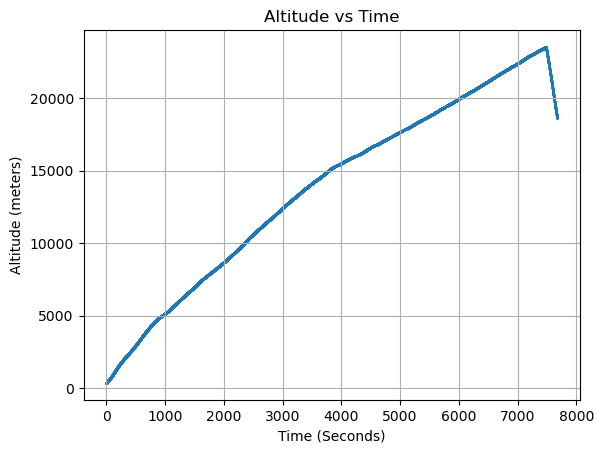

In [40]:
sc = plt.scatter(data['seconds'], data['Height'], s=1)

plt.title("Altitude vs Time")
plt.ylabel("Altitude (meters)")
plt.xlabel("Time (Seconds)")
plt.grid()
plt.show()

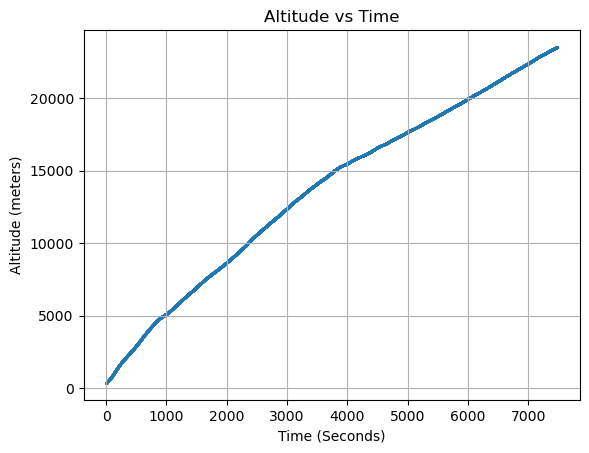

In [41]:
max_height_time = data.loc[data['Height'].idxmax(), 'Time']
data = data[data.sort_values(by = 'Time')['Time'] <=max_height_time]

sc = plt.scatter(data['seconds'], data['Height'], s=1)

plt.title("Altitude vs Time")
plt.ylabel("Altitude (meters)")
plt.xlabel("Time (Seconds)")
plt.grid()
plt.show()

In [42]:
data.describe()

,Height,WS,WD,Time,seconds
count,7481.000000,7481.000000,7481.000000,7481,7481.000000
mean,13660.412792,8.954896,174.287863,2024-07-09 18:18:54,3740.000000
min,360.000000,0.120000,10.890000,2024-07-09 17:16:34,0.000000
25%,8251.500000,5.080000,113.540000,2024-07-09 17:47:44,1870.000000
50%,14863.900000,7.090000,150.130000,2024-07-09 18:18:54,3740.000000
75%,19050.600000,10.380000,248.930000,2024-07-09 18:50:04,5610.000000
max,23543.200000,29.970000,316.170000,2024-07-09 19:21:14,7480.000000
std,6436.927056,6.574301,71.461348,NaN,2159.723015


In [43]:
data

,Height,WS,WD,Temp0,Time,seconds
0,360.0,5.30,80.00,22.0,2024-07-09 17:16:34,0.0
1,363.2,6.36,64.71,21.8,2024-07-09 17:16:35,1.0
2,367.8,6.78,88.95,21.9,2024-07-09 17:16:36,2.0
3,372.8,7.14,95.80,22.0,2024-07-09 17:16:37,3.0
4,377.3,6.95,98.25,22.0,2024-07-09 17:16:38,4.0
...,...,...,...,...,...,...
7476,23534.1,7.15,244.98,-62.0,2024-07-09 19:21:10,7476.0
7477,23536.3,7.31,242.02,-62.0,2024-07-09 19:21:11,7477.0
7478,23538.6,7.43,238.26,-62.0,2024-07-09 19:21:12,7478.0
7479,23540.8,7.41,236.09,-62.1,2024-07-09 19:21:13,7479.0


In [46]:
data.loc[data['Temp0'] == '-----','Temp0'] = np.nan
data['Temp0'] = data['Temp0'].astype(float)

data['Temp'] = data['Temp0'] + 273
data.drop(['Temp0'],axis=1, inplace=True)

/tmp/ipykernel_26344/824419644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Temp0'] = data['Temp0'].astype(float)
/tmp/ipykernel_26344/824419644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Temp'] = data['Temp0'] + 273
/tmp/ipykernel_26344/824419644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

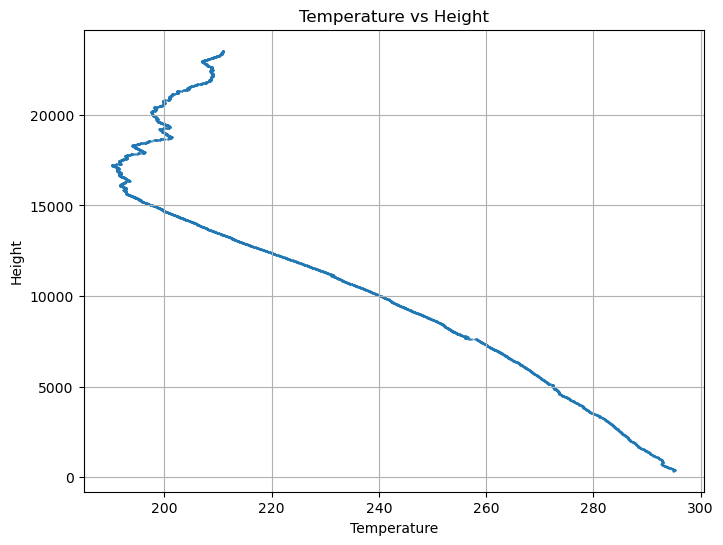

In [47]:
data_wTemp = data.groupby(['Height'])[['Temp']].mean()

x = data_wTemp.loc[:,'Temp']
y = data_wTemp.index


plt.figure(figsize=(8,6))
plt.scatter(x,y,s=0.1)

plt.xlabel("Temperature")
plt.ylabel("Height")
plt.title("Temperature vs Height")

plt.grid()
plt.show()

In [75]:
import pandas as pd
import numpy as np
import warnings 

warnings.filterwarnings('ignore') # ignore warnings in output 

df = pd.read_csv('/home/murali/Documents/rass/data/2021_weather_data/Jan/F2021010617S8050014.CSV', skiprows = 6)
pd.set_option('display.max_columns', None)
df.columns = df.columns.str.strip()

wanted_cols = ['ObsTime', 'Height', 'WS', 'WD', 'Temp0']
data = df[wanted_cols]

# time 
data['Time'] = pd.to_datetime(data['ObsTime'])
data.drop(['ObsTime'], axis=1, inplace = True)

data['timedelta'] = data['Time'] - data.loc[0,'Time']
data['seconds'] = data['timedelta'].dt.total_seconds()
data.drop(['timedelta'],axis=1,inplace=True)

# cleaning after the max height and if less than 0
max_height_time = data.loc[data['Height'].idxmax(), 'Time']
data = data[data.sort_values(by = 'Time')['Time'] <=max_height_time]
idx = data.loc[data['Height']<0].index
data.drop(idx, inplace=True)

# cleaning the data
data.loc[data['Temp0'] == '-----','Temp0'] = np.nan
data['Temp0'] = data['Temp0'].astype(float)
data['Temp'] = data['Temp0'] + 273
data.drop(['Temp0'],axis=1, inplace=True)
data = data[~data['Temp'].isna()]

bin_size = 200

data['Height_bin'] = (data['Height'] // bin_size) * bin_size
grouped = data.groupby('Height_bin').mean().reset_index()
grouped['WD_'] = (grouped['WD'] + 180) % 360
grouped

,Height_bin,Height,WS,WD,Time,seconds,Temp,WD_
0,200.0,378.790000,6.815000,90.153000,2024-07-09 17:16:38.500000000,4.5,295.060000,270.153000
1,400.0,499.941860,9.063256,97.106744,2024-07-09 17:17:05.000000000,31.0,294.351163,277.106744
2,600.0,698.835135,10.397297,106.171351,2024-07-09 17:17:45.000000000,71.0,292.902703,286.171351
3,800.0,899.434375,9.980313,113.281250,2024-07-09 17:18:19.500000000,105.5,292.765625,293.281250
4,1000.0,1096.865625,9.990625,116.765000,2024-07-09 17:18:51.500000000,137.5,291.887500,296.765000
...,...,...,...,...,...,...,...,...
112,22600.0,22699.695946,5.508108,281.783919,2024-07-09 19:15:05.500000000,7111.5,208.283784,101.783919
113,22800.0,22905.020238,7.471905,278.417738,2024-07-09 19:16:24.500000000,7190.5,207.298810,98.417738
114,23000.0,23098.354945,6.216813,270.561099,2024-07-09 19:17:51.999999744,7278.0,208.394505,90.561099
115,23200.0,23300.474157,7.117865,251.547416,2024-07-09 19:19:22.000000000,7368.0,210.253933,71.547416


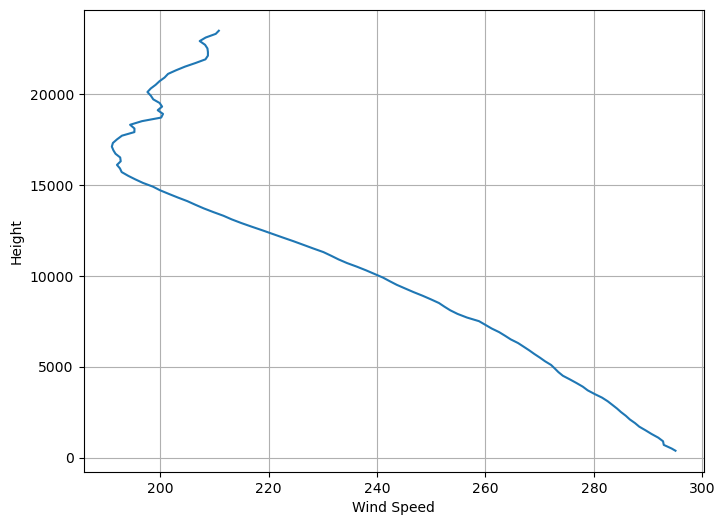

In [76]:
plt.figure(figsize=(8,6))
plt.plot(grouped['Temp'],grouped['Height'])
plt.xlabel("Wind Speed")
plt.ylabel("Height")
plt.grid()
plt.show()

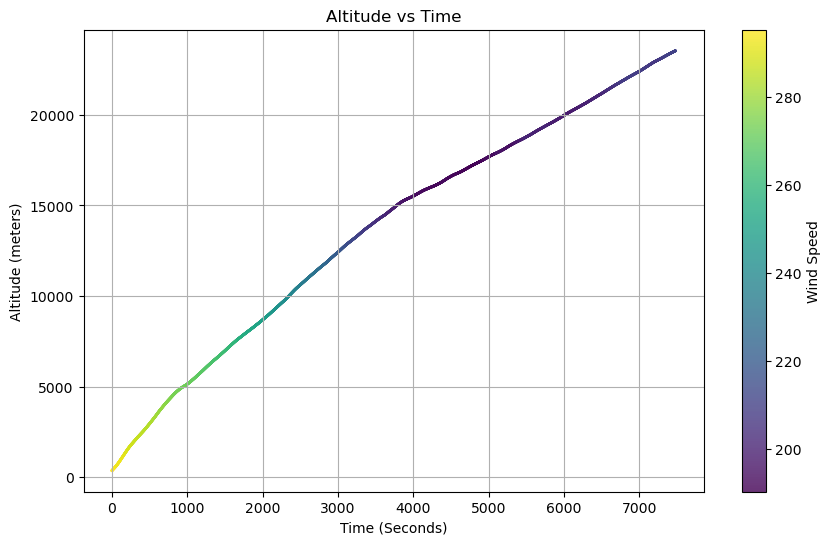

In [77]:
plt.figure(figsize=(10, 6))

sc = plt.scatter(data['seconds'], data['Height'], c=data['Temp'], cmap='viridis', alpha=0.8, s=1)

cbar = plt.colorbar(sc)
cbar.set_label('Wind Speed')

plt.title("Altitude vs Time")
plt.ylabel("Altitude (meters)")
plt.xlabel("Time (Seconds)")
plt.grid()
plt.show()

In [97]:
df_processed_wf = pd.read_csv('/home/murali/Documents/rass/automation/F2021010617S8050014_processed_wf.csv')
df_processed_wf

,x,y,z,theta,time,phi
0,0.000,0.00000,0.00000,-1.57080,0,0
1,-340.600,-8.01756,-2.16757,-1.58348,1,0
2,-681.091,-16.27270,-8.68000,-1.59623,2,0
3,-1021.360,-25.00850,-19.56640,-1.60911,3,0
4,-1361.280,-34.47990,-34.87500,-1.62219,4,0
...,...,...,...,...,...,...
24145,-27185.500,-143889.00000,-14634.20000,3.14159,64,0
24146,-29637.200,-153637.00000,-14977.20000,3.14159,65,0
24147,-32203.500,-163823.00000,-15320.20000,3.14159,66,0
24148,-34887.300,-174455.00000,-15663.20000,3.14159,67,0


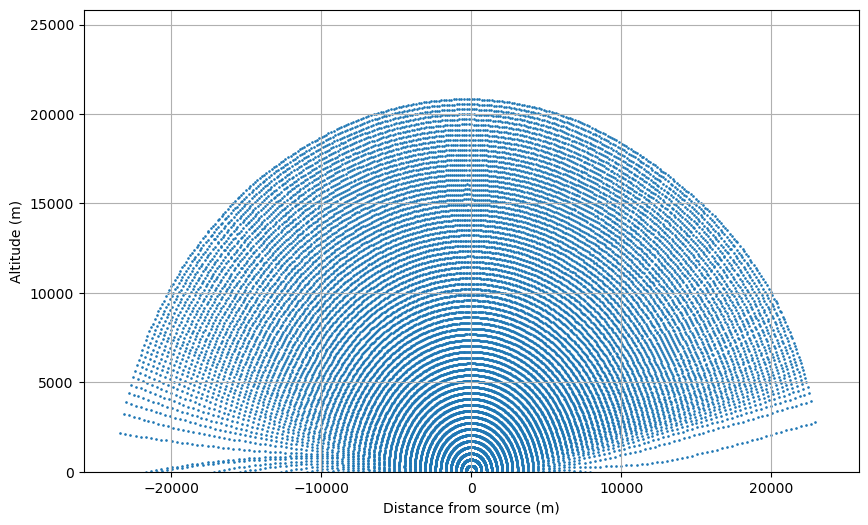

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(df_processed_wf['x'],df_processed_wf['z'], s=0.8)

dist = df_processed_wf['z'].max() + 5000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")

plt.grid()
plt.show()

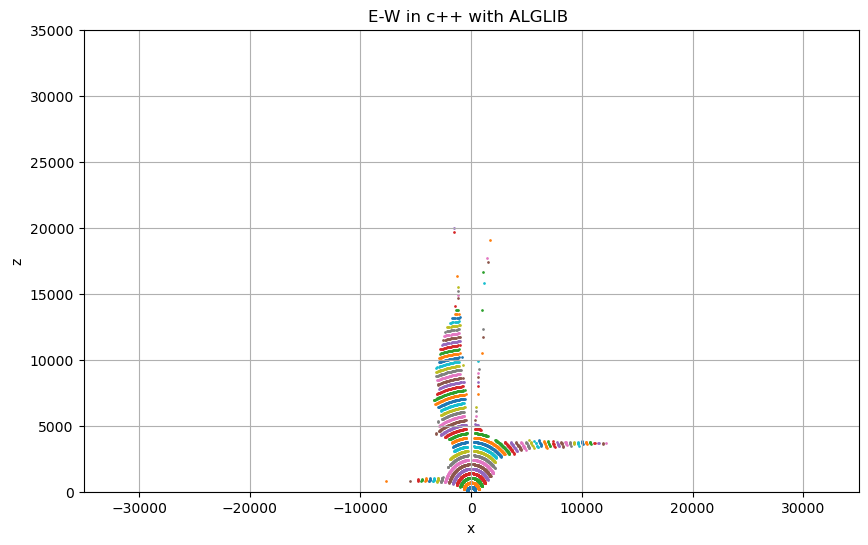

In [4]:
dfa = pd.read_csv('/home/murali/Documents/rass/automation/gen_data/F2021041817S9002660_processed_wf.csv')
# dfa = dfa[dfa['phi'] != 0].reset_index(drop=True)
dfa = dfa[dfa['z']>=0]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['theta']>= -np.pi/2)]
# dfa = dfa[(dfa['phi'] <= np.pi/2) & (dfa['phi']>= 0)]

group_t = dfa.groupby('time')

plt.figure(figsize=(10, 6))

for t in dfa['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('x')
        df_ = df_.drop_duplicates(subset='x')
        
        wave_eq = CubicSpline(df_['x'],df_['z'])
        
        x_l = []
        y_l = []
        for x0 in df_['x'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
            
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 65:
                x_l.append(x0)
                y_l.append(wave_eq(x0))
                
        plt.scatter(x_l,y_l, s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel('x')
plt.ylabel('z')
plt.title('E-W in c++ with ALGLIB ')
plt.grid()
plt.show()

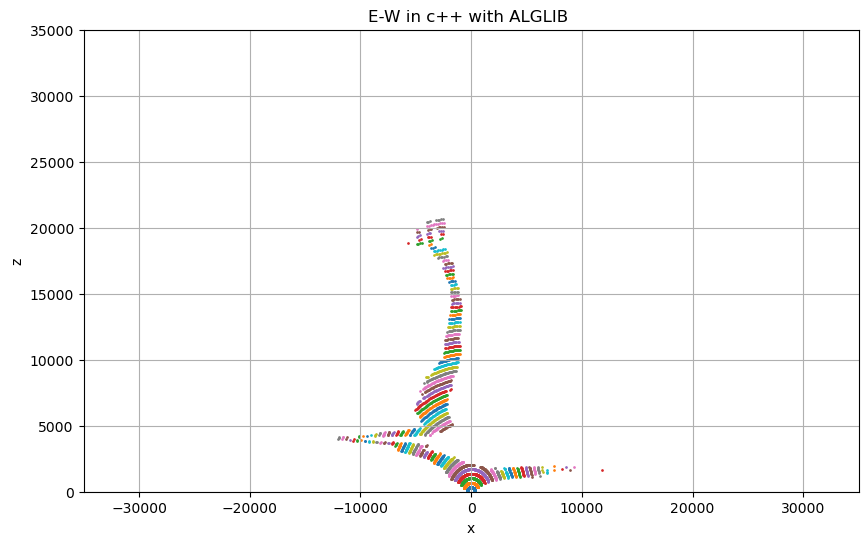

In [101]:
dfa = pd.read_csv('/home/murali/Documents/rass/automation/F2021010617S8050014_processed_wf.csv')
dfa = dfa[dfa['phi'] != 0].reset_index(drop=True)
dfa = dfa[dfa['z']>=0]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['theta']>= -np.pi/2)]
# dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['phi']>= 0)]

group_t = dfa.groupby('time')

plt.figure(figsize=(10, 6))

for t in dfa['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('y')
        df_ = df_.drop_duplicates(subset='y')
        
        wave_eq = CubicSpline(df_['y'],df_['z'])
        
        x_l = []
        y_l = []
        for x0 in df_['y'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 50:
                x_l.append(x0)
                y_l.append(wave_eq(x0))
                
        plt.scatter(x_l,y_l, s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel('x')
plt.ylabel('z')
plt.grid()
plt.show()

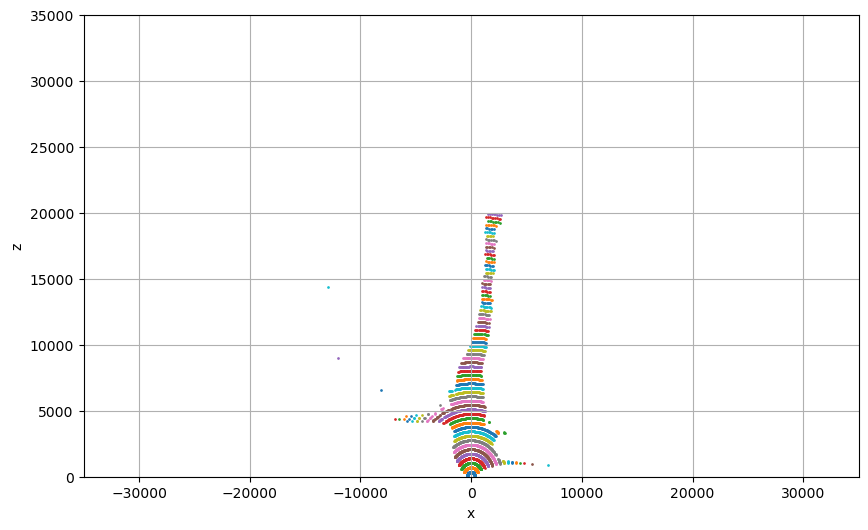

In [3]:
dfa = pd.read_csv('/home/murali/Documents/rass/automation/gen_data/F2021041817S9002660_processed_wf.csv')
dfa = dfa[dfa['phi'] != 0].reset_index(drop=True)
dfa = dfa[dfa['z']>=0]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['theta']>= -np.pi/2)]
# dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['phi']>= 0)]

group_t = dfa.groupby('time')

plt.figure(figsize=(10, 6))

for t in dfa['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('y')
        df_ = df_.drop_duplicates(subset='y')
        
        wave_eq = CubicSpline(df_['y'],df_['z'])
        
        x_l = []
        y_l = []
        for x0 in df_['y'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 50:
                x_l.append(x0)
                y_l.append(wave_eq(x0))
                
        plt.scatter(x_l,y_l, s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel('x')
plt.ylabel('z')
plt.grid()
plt.show()

In [7]:
dfa_1 = pd.read_csv('/home/murali/Documents/rass/automation/gen_data/F2021041017S9002652_cleaned.csv')
dfa_2 = pd.read_csv('/home/murali/Documents/rass/automation/gen_data/F2021041817S9002660_cleaned.csv')
dfa_1, dfa_2

(           Height        Temp         WS          WD
 0      375.812500  305.537500   1.581250  100.275000
 1      448.647059  304.535294   3.140588  130.132941
 2      551.681250  303.487500   3.783125  126.498750
 3      649.056250  302.431250   4.060000  117.283125
 4      748.635294  301.423529   4.602941  114.132941
 ..            ...         ...        ...         ...
 260  26547.881250  223.806250  13.070000   81.366250
 261  26649.831250  224.175000  13.191250   80.694375
 262  26749.606667  224.713333  13.968000   79.464000
 263  26849.931250  225.093750  14.566250   75.866250
 264  26917.780000  225.680000  15.038000   71.140000
 
 [265 rows x 4 columns],
            Height        Temp        WS          WD
 0      375.587500  306.800000  0.756250  196.742500
 1      452.200000  306.273333  1.536667  150.732000
 2      551.006667  305.346667  1.840000  153.086667
 3      648.820000  304.406667  2.035333  154.593333
 4      748.162500  303.462500  2.202500  147.401875
 ..    

In [8]:
pd.concat([dfa_1,dfa_2])

,Height,Temp,WS,WD
0,375.812500,305.537500,1.581250,100.275000
1,448.647059,304.535294,3.140588,130.132941
2,551.681250,303.487500,3.783125,126.498750
3,649.056250,302.431250,4.060000,117.283125
4,748.635294,301.423529,4.602941,114.132941
...,...,...,...,...
218,22151.643750,215.068750,5.571875,95.246875
219,22250.281250,215.718750,7.143125,92.226875
220,22349.415789,216.336842,8.755263,82.095789
221,22450.434783,216.239130,8.629130,74.130000
